# Figure 18 - Gillet et al. (2024)

In [2]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim

import matplotlib.pyplot as plt
import numpy as np

/Users/m/Research/wind-ae/wind_ae/wrapper/wrapper_utils/windsoln.py:515: RuntimeWarning: invalid value encountered in divide
  f = np.nan_to_num(sig_matrix * n0_matrix / f_denom)  # frac of incident photon flux that will interact with species s
/Users/m/Research/wind-ae/wind_ae/wrapper/wrapper_utils/windsoln.py:515: RuntimeWarning: invalid value encountered in divide
  f = np.nan_to_num(sig_matrix * n0_matrix / f_denom)  # frac of incident photon flux that will interact with species s


<Figure size 1500x1000 with 0 Axes>

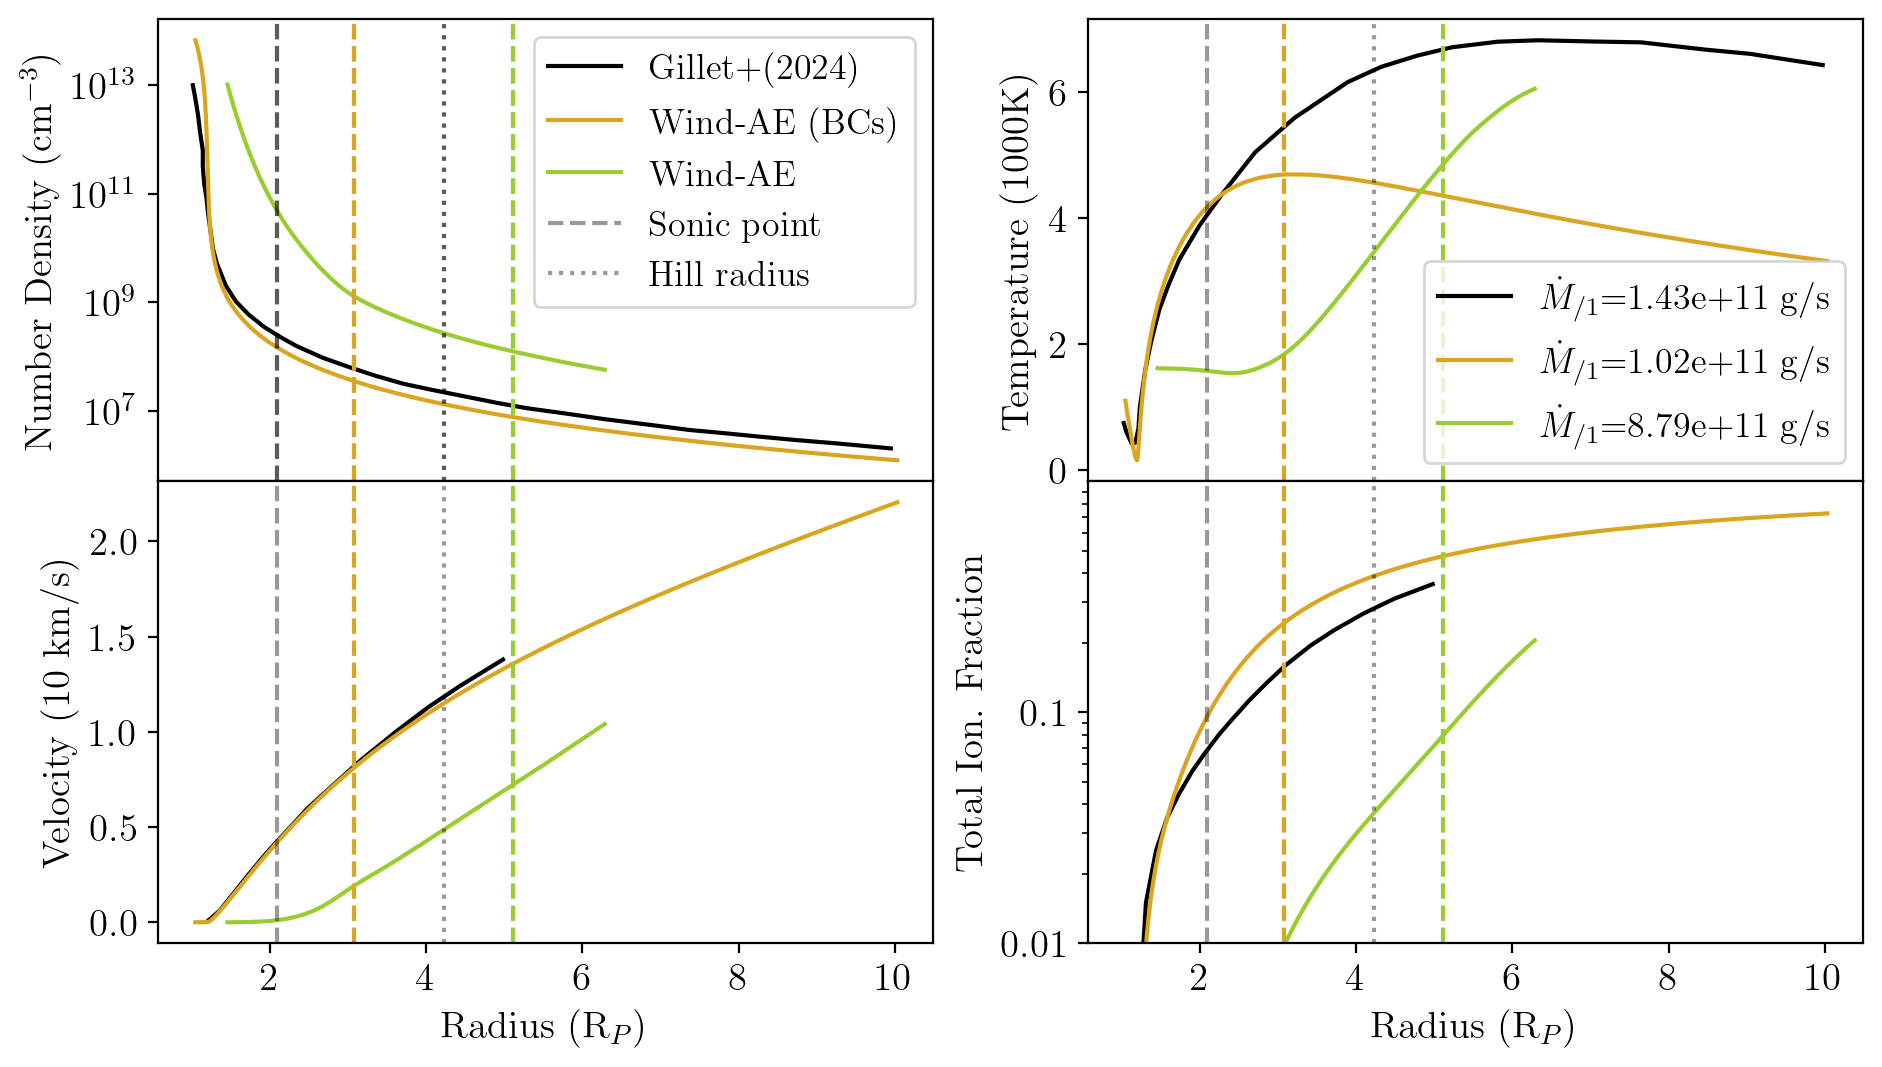

In [ ]:
sim = wind_sim()
Rsp = 2.1
# sim.load_planet('saves/windsoln.csv')
# sim.load_uservars('../relaxed-wind_good/saves/for_paper/Gillet/smoothed_M0.05_13.6-2000eV_H-He_solar.csv')
sim.load_uservars('data/Gillet_wind-ae_soln.csv')
r = sim.windsoln.soln_norm['r']
sim2=wind_sim()
# sim2.load_planet('../relaxed-wind_good/saves/for_paper/Gillet/0.3Lsun_spectrum.csv')
# sim2.load_planet('saves/windsoln.csv')
sim2.load_uservars('data/Gillet_nobolo.csv')
r2 = sim2.windsoln.soln_norm['r']

plt.figure(figsize=[15,10])
kub = 'k'
tc='goldenrod'
windae='yellowgreen'

fig, ax = plt.subplots(2,2,sharex=True,figsize=[11,6])
fig.subplots_adjust(hspace=0)

# ax[0,0] = plt.subplot(221)
r_v,v = np.genfromtxt('data/Gillet_density.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[0,0].plot(r_v,v,label='Gillet+(2024)',c=kub)
ax[0,0].plot(r2,sim2.windsoln.soln['n_tot'],c=tc,label='Wind-AE (BCs)')
ax[0,0].plot(r,sim.windsoln.soln['n_tot'],c=windae,label='Wind-AE')
ax[0,0].axvline(sim.windsoln.R_sp,c=windae,ls='--')
ax[0,0].axvline(sim2.windsoln.R_sp,c=tc,ls='--')
ax[0,0].axvline(Rsp,c=kub,ls='--',label='Sonic point',alpha=0.4)
ax[0,0].axvline(sim.windsoln.R_hill,c='k',alpha=0.4,ls=':',label='Hill radius')
ax[0,0].set_ylabel('Number Density (cm$^{-3}$)')
# ax[0,0].set_xlabel(r'R$_P$')
ax[0,0].set_yscale('log')
ax[0,0].legend(fontsize=13)

# plt.subplot(2,2,2)
# ax[1,0] = plt.subplot(222)
r_T,T = np.genfromtxt('data/Gillet_temperature.csv',delimiter=',',
                      skip_header=1).T #1 K
ax[0,1].plot(r_T,T/1000,label=r'$\dot{M}_{/1}$=%.2e g/s'%1.43e11,c=kub)
ax[0,1].plot(r2,sim2.windsoln.soln['T']/1000,c=tc,label=r'$\dot{M}_{/1}$=%.2e g/s'%(sim2.windsoln.Mdot*3))
ax[0,1].plot(r,sim.windsoln.soln['T']/1000,c=windae,label=r'$\dot{M}_{/1}$=%.2e g/s'%(sim.windsoln.Mdot*3))
ax[0,1].set_ylabel('Temperature (1000K)')
# ax[0,1].set_xlabel(r'R$_P$')
ax[0,1].legend(fontsize=13)
# plt.show()

# ax[0,1] = plt.subplot(223,sharex=ax[0,0])
r_v,v = np.genfromtxt('data/Gillet_velocity.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[1,0].plot(r_v,v/10,c=kub)
ax[1,0].plot(r2,sim2.windsoln.soln['v']/1e5/10,c=tc)
ax[1,0].plot(r,sim.windsoln.soln['v']/1e5/10,c=windae)
ax[1,0].set_ylabel('Velocity (10 km/s)')
# ax[1,0].set_xlabel(r'R$_P$')
# plt.show()

# ax[1,1] = plt.subplot(224,sharex=ax[1,0])
# plt.subplot(2,2,4)
r_v,v = np.genfromtxt('data/Gillet/ion_frac.csv',delimiter=',',
                      skip_header=1).T #km/s
ax[1,1].plot(r_v,v,c=kub)

ionfrac = (sim.windsoln.soln['n_HII']+sim.windsoln.soln['n_HeII'])/sim.windsoln.soln['n_tot']
ionfrac2 = (sim2.windsoln.soln['n_HII']+sim2.windsoln.soln['n_HeII'])/sim2.windsoln.soln['n_tot']
ax[1,1].plot(r,ionfrac,c=windae)
ax[1,1].plot(r2,ionfrac2,c=tc)
ax[1,1].set_ylabel('Total Ion. Fraction')
ax[1,1].set_ylim(1e-2,1)
ax[1,1].set_yscale('log')
ax[1,1].set_yticks([0.01,0.1])
ax[1,1].set_yticklabels(['0.01','0.1'])

for i in range(2):
    for j in range(2):
        ax[i,j].axvline(sim.windsoln.R_sp,c=windae,ls='--')
        ax[i,j].axvline(sim2.windsoln.R_sp,c=tc,ls='--')
        ax[i,j].axvline(Rsp,c=kub,ls='--',alpha=0.4)
        ax[i,j].axvline(sim.windsoln.R_hill,c='k',alpha=0.4,ls=':')
        ax[i,j].set_xlabel(r'Radius (R$_P$)')
# plt.savefig('../Figures/Final/gillet_compare.pdf',dpi=300,bbox_inches='tight',facecolor='white')
plt.show()